<h1 align=center><font size = 5>Final Capstone Project (Identifying Clusters of Indian Restaurants in Toronto) </font></h1>

## Table of Contents

1. <a href="#item1">Introduction/Background </a>
2. <a href="#item1">Data Sources </a>

    2.1 <a href="#item1">Import Necessary Libraries        </a>
    
    2.2 <a href="#item2">Setup Credentials and search criteria for Foursquare API </a>  
    2.3 <a href="#item3">Call Foursquare data and explore the fetched data </a>  
    2.4 <a href="#item4">Clean the Foursquare data </a>  
    2.5 <a href="#item5">Visualize the data </a>  

3. <a href="#item5">Methodology: Cluster the data with k-means </a>
4. <a href="#item5">Results</a>  
5. <a href="#item5">Discussion and Conclusions </a>  

## 1. Introduction/Background

Toronto is a popular destination for exploring various attractive areas/places of interest e.g. Casaloma, Toronto Zoo, Royal Ontario Museum etc. Toronto is also known for its restaurants with cuisine from all over the world. Indian restaurants are very popular among the visitors in Toronto. It is therefore intriguing to identify clusters of Indian restaurants so visitors interested in Indian cuisine can go in one of those clusters to try different authentic Indian foods. The findings of this project would also be of interest for someone who wants to open a new Indian restaurant in Toronto. 
In this project, I will use Foursquare API to call for Indian restaurants and analyze them to identify potential clusters of indian restaurant. I will also try to visualize the data from Foursquare using the visualization library, Folium.

## 2. Data Sources

This project will utilize data from Foursquare. Foursquare is a technology company that built a massive dataset of location data. What is interesting about Foursquare is that they were very smart about building their dataset. They actually crowd-sourced their data and had people use their app to build their dataset and add venues and complete any missing information they had in their dataset. Currently its location data is the most comprehensive out there, and quite accurate that it powers location data for many popular services like Apple Maps, Uber, Snapchat, Twitter and many others, and is currently being used by over 100,000 developers, and this number is only growing.

### 2.1 Import necessary Libraries

In [32]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [33]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt

### 2.2. Setup Credentials and search criteria for Foursquare API

#### For this project, I am using a search radius of 50km from Toronto Downtown and also limiting the number of fetched Indian restaurants to 1000 

In [34]:
CLIENT_ID = 'UVLT2USN3UVPJHD5OQJDWVTNXKDOP5GY1SBFNL4CH1FFJZQP' # your Foursquare ID
CLIENT_SECRET = '1X5MK1WUIHARO0HUMPCBH3QIGSYP3WATKPTB3GGEBR5R5KPE' # your Foursquare Secret
VERSION = '20190630'
LIMIT = 1000
latitude = 43.687327
longitude = -79.402153
search_query = 'Indian'
radius = 50000
indian = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
indian

'https://api.foursquare.com/v2/venues/search?client_id=UVLT2USN3UVPJHD5OQJDWVTNXKDOP5GY1SBFNL4CH1FFJZQP&client_secret=1X5MK1WUIHARO0HUMPCBH3QIGSYP3WATKPTB3GGEBR5R5KPE&ll=43.687327,-79.402153&v=20190630&query=Indian&radius=50000&limit=1000'

<a id="item1"></a>

### 2.3. Call Foursquare data and explore the fetched data

In [35]:
results = requests.get(indian).json()
results

{'meta': {'code': 200, 'requestId': '5d1cd350bbf1bd002322a25e'},
 'response': {'venues': [{'id': '4b7ccc72f964a520e3a52fe3',
    'name': 'Banjara Indian Cuisine',
    'location': {'address': '164 Eglinton Ave E',
     'crossStreet': 'at Redpath Ave',
     'lat': 43.7078104847312,
     'lng': -79.3932956275409,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.7078104847312,
       'lng': -79.3932956275409}],
     'distance': 2389,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['164 Eglinton Ave E (at Redpath Ave)',
      'Toronto ON',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1562170192',
    'hasPerk': False},
   {'id': '4cc5

### 2.4 Clean the fetched data

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [36]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4b7ccc72f964a520e3a52fe3,164 Eglinton Ave E,CA,Toronto,Canada,at Redpath Ave,2389,"[164 Eglinton Ave E (at Redpath Ave), Toronto ...","[{'label': 'display', 'lat': 43.7078104847312,...",43.707810,-79.393296,NaN,ON,Banjara Indian Cuisine,v-1562170192,NaN
1,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4cc5b3babe40a35d7c01864c,285 Indian Road Cres,CA,Toronto,Canada,NaN,5389,"[285 Indian Road Cres, Toronto ON M6P 2G8, Can...","[{'label': 'display', 'lat': 43.66249140470172...",43.662491,-79.459608,M6P 2G8,ON,Indian Road Crescent Public School,v-1562170192,NaN
2,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4aef8854f964a5201cd921e3,287 King St. W,CA,Toronto,Canada,at John St.,4659,"[287 King St. W (at John St.), Toronto ON M5V ...","[{'label': 'display', 'lat': 43.64646252150344...",43.646463,-79.389644,M5V 1J5,ON,Aroma Fine Indian Restaurant,v-1562170192,NaN
3,"[{'id': '4bf58dd8d48988d12a941735', 'name': 'C...",False,4ecfd06c0aafd1868e2ff8da,25 St Clair Ave W,CA,Toronto,Canada,NaN,819,"[25 St Clair Ave W, Toronto ON M4V 1L3, Canada]","[{'label': 'display', 'lat': 43.68858549, 'lng...",43.688585,-79.392120,M4V 1L3,ON,Indian Affairs,v-1562170192,NaN
4,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4d7c569786cfa1438065c8a0,69 Yorkville Ave.,CA,Toronto,Canada,NaN,2018,"[69 Yorkville Ave., Toronto ON M5R 1B8, Canada]","[{'label': 'display', 'lat': 43.67115433553916...",43.671154,-79.390802,M5R 1B8,ON,Utsav Indian Cuisine,v-1562170192,NaN


#### Define information of interest and filter dataframe

In [37]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Banjara Indian Cuisine,Indian Restaurant,164 Eglinton Ave E,CA,Toronto,Canada,at Redpath Ave,2389,"[164 Eglinton Ave E (at Redpath Ave), Toronto ...","[{'label': 'display', 'lat': 43.7078104847312,...",43.707810,-79.393296,NaN,ON,4b7ccc72f964a520e3a52fe3
1,Indian Road Crescent Public School,School,285 Indian Road Cres,CA,Toronto,Canada,NaN,5389,"[285 Indian Road Cres, Toronto ON M6P 2G8, Can...","[{'label': 'display', 'lat': 43.66249140470172...",43.662491,-79.459608,M6P 2G8,ON,4cc5b3babe40a35d7c01864c
2,Aroma Fine Indian Restaurant,Indian Restaurant,287 King St. W,CA,Toronto,Canada,at John St.,4659,"[287 King St. W (at John St.), Toronto ON M5V ...","[{'label': 'display', 'lat': 43.64646252150344...",43.646463,-79.389644,M5V 1J5,ON,4aef8854f964a5201cd921e3
3,Indian Affairs,Capitol Building,25 St Clair Ave W,CA,Toronto,Canada,NaN,819,"[25 St Clair Ave W, Toronto ON M4V 1L3, Canada]","[{'label': 'display', 'lat': 43.68858549, 'lng...",43.688585,-79.392120,M4V 1L3,ON,4ecfd06c0aafd1868e2ff8da
4,Utsav Indian Cuisine,Indian Restaurant,69 Yorkville Ave.,CA,Toronto,Canada,NaN,2018,"[69 Yorkville Ave., Toronto ON M5R 1B8, Canada]","[{'label': 'display', 'lat': 43.67115433553916...",43.671154,-79.390802,M5R 1B8,ON,4d7c569786cfa1438065c8a0
5,Bhoj Indian Cuisine,Indian Restaurant,21 Davenport Rd,CA,Toronto,Canada,NaN,1933,"[21 Davenport Rd, Toronto ON M5R 1H2, Canada]","[{'label': 'display', 'lat': 43.67276456431629...",43.672765,-79.389063,M5R 1H2,ON,56c743c7498e7033ff262ce2
6,Banjara Indian Cuisine,Indian Restaurant,796 Bloor St W,CA,Toronto,Canada,at Crawford St,3148,"[796 Bloor St W (at Crawford St), Toronto ON M...","[{'label': 'display', 'lat': 43.66291638533112...",43.662916,-79.421911,M6G 1L8,ON,4adb969ef964a520332921e3
7,Indian Roti House,Indian Restaurant,256 Queens Quay W,CA,Toronto,Canada,btwn Rees St & Lower Simcoe S,5539,[256 Queens Quay W (btwn Rees St & Lower Simco...,"[{'label': 'display', 'lat': 43.63906038875002...",43.639060,-79.385422,M5J 1B5,ON,50b79b94e4b0a577af25a83f
8,Indian Grocerries and Spice,Market,1983 Lawrence Ave E,CA,Toronto,Canada,Lilian Dr,10727,"[1983 Lawrence Ave E (Lilian Dr), Toronto ON M...","[{'label': 'display', 'lat': 43.74530493763506...",43.745305,-79.295647,M1R 2Z1,ON,4e204c5118501a60d2fe2bf4
9,Rajput's Indian Bistro,None,111 Dupont St.,CA,Toronto,Canada,Davenport,1455,"[111 Dupont St. (Davenport), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.674801, 'lng':...",43.674801,-79.396966,NaN,ON,4c2650a2905a0f4796106360


#### More filtering (cleaning the data)
We can see that not all of the fetched records (rows) have category as 'Indian Restaurant'. Therefore, we need to remove any records with category not labeled as Indian Restaurant. 

In [38]:
a = ['Indian Restaurant']
dataframe_filtered = dataframe_filtered[dataframe_filtered['categories'].isin(a)]
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Banjara Indian Cuisine,Indian Restaurant,164 Eglinton Ave E,CA,Toronto,Canada,at Redpath Ave,2389,"[164 Eglinton Ave E (at Redpath Ave), Toronto ...","[{'label': 'display', 'lat': 43.7078104847312,...",43.707810,-79.393296,NaN,ON,4b7ccc72f964a520e3a52fe3
2,Aroma Fine Indian Restaurant,Indian Restaurant,287 King St. W,CA,Toronto,Canada,at John St.,4659,"[287 King St. W (at John St.), Toronto ON M5V ...","[{'label': 'display', 'lat': 43.64646252150344...",43.646463,-79.389644,M5V 1J5,ON,4aef8854f964a5201cd921e3
4,Utsav Indian Cuisine,Indian Restaurant,69 Yorkville Ave.,CA,Toronto,Canada,NaN,2018,"[69 Yorkville Ave., Toronto ON M5R 1B8, Canada]","[{'label': 'display', 'lat': 43.67115433553916...",43.671154,-79.390802,M5R 1B8,ON,4d7c569786cfa1438065c8a0
5,Bhoj Indian Cuisine,Indian Restaurant,21 Davenport Rd,CA,Toronto,Canada,NaN,1933,"[21 Davenport Rd, Toronto ON M5R 1H2, Canada]","[{'label': 'display', 'lat': 43.67276456431629...",43.672765,-79.389063,M5R 1H2,ON,56c743c7498e7033ff262ce2
6,Banjara Indian Cuisine,Indian Restaurant,796 Bloor St W,CA,Toronto,Canada,at Crawford St,3148,"[796 Bloor St W (at Crawford St), Toronto ON M...","[{'label': 'display', 'lat': 43.66291638533112...",43.662916,-79.421911,M6G 1L8,ON,4adb969ef964a520332921e3
7,Indian Roti House,Indian Restaurant,256 Queens Quay W,CA,Toronto,Canada,btwn Rees St & Lower Simcoe S,5539,[256 Queens Quay W (btwn Rees St & Lower Simco...,"[{'label': 'display', 'lat': 43.63906038875002...",43.639060,-79.385422,M5J 1B5,ON,50b79b94e4b0a577af25a83f
10,Indian Biriyani House,Indian Restaurant,181 Dundas St W,CA,Toronto,Canada,W of Chestnut St,3796,"[181 Dundas St W (W of Chestnut St), Toronto O...","[{'label': 'display', 'lat': 43.65511996683289...",43.655120,-79.386645,M5G 1C7,ON,4afd920ff964a520ad2822e3
11,Indian Street Food Co.,Indian Restaurant,1701 Bayview,CA,Toronto,Canada,Eglinton,3116,"[1701 Bayview (Eglinton), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.7080316171988,...",43.708032,-79.376086,NaN,ON,5650eed9498e376aac0c2478
13,Indian Roti House,Indian Restaurant,NaN,CA,Toronto,Canada,NaN,3093,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.66438249736424...",43.664382,-79.380468,NaN,ON,547f94e9498e62f695829624
14,Maja Indian Cuisine,Indian Restaurant,345 Bloor,CA,Toronto,Canada,NaN,2546,"[345 Bloor, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67198623947951...",43.671986,-79.378685,NaN,ON,55f75919498ea2710ea79060


### 2.5 Visualize the data

In [39]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent Toronto Downtown
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toronto Downtown',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Indian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<a id="item2"></a>

## 3. Methodology: Cluster the data with k-means


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

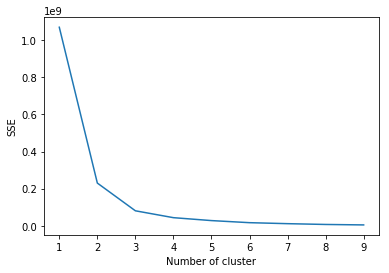

In [40]:
# keep only variables that would be considered for clustering which are lat, long, and distance from downtown
toronto_clustering = dataframe_filtered[['distance', 'lat', 'lng']]

# utilizing Elbow method to identify suitable number of clusters in the Indian restaurant data (i.e. trying 1 to 5 clusters)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(toronto_clustering)
    toronto_clustering["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## 4. Results
#### From the above figure, it is apparent that there are only 2/3 clusters of Indian restaurants in Toronto. Therefore, running k-means for 3 clusters

In [41]:
kclusters=3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)

#### Let's create a new dataframe that includes the cluster for each restaurant

In [42]:
# add clustering labels
dataframe_filtered.insert(0, 'Cluster Labels', kmeans.labels_)
dataframe_clustered = dataframe_filtered
dataframe_clustered

,Cluster Labels,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,0,Banjara Indian Cuisine,Indian Restaurant,164 Eglinton Ave E,CA,Toronto,Canada,at Redpath Ave,2389,"[164 Eglinton Ave E (at Redpath Ave), Toronto ...","[{'label': 'display', 'lat': 43.7078104847312,...",43.707810,-79.393296,NaN,ON,4b7ccc72f964a520e3a52fe3
2,0,Aroma Fine Indian Restaurant,Indian Restaurant,287 King St. W,CA,Toronto,Canada,at John St.,4659,"[287 King St. W (at John St.), Toronto ON M5V ...","[{'label': 'display', 'lat': 43.64646252150344...",43.646463,-79.389644,M5V 1J5,ON,4aef8854f964a5201cd921e3
4,0,Utsav Indian Cuisine,Indian Restaurant,69 Yorkville Ave.,CA,Toronto,Canada,NaN,2018,"[69 Yorkville Ave., Toronto ON M5R 1B8, Canada]","[{'label': 'display', 'lat': 43.67115433553916...",43.671154,-79.390802,M5R 1B8,ON,4d7c569786cfa1438065c8a0
5,0,Bhoj Indian Cuisine,Indian Restaurant,21 Davenport Rd,CA,Toronto,Canada,NaN,1933,"[21 Davenport Rd, Toronto ON M5R 1H2, Canada]","[{'label': 'display', 'lat': 43.67276456431629...",43.672765,-79.389063,M5R 1H2,ON,56c743c7498e7033ff262ce2
6,0,Banjara Indian Cuisine,Indian Restaurant,796 Bloor St W,CA,Toronto,Canada,at Crawford St,3148,"[796 Bloor St W (at Crawford St), Toronto ON M...","[{'label': 'display', 'lat': 43.66291638533112...",43.662916,-79.421911,M6G 1L8,ON,4adb969ef964a520332921e3
7,0,Indian Roti House,Indian Restaurant,256 Queens Quay W,CA,Toronto,Canada,btwn Rees St & Lower Simcoe S,5539,[256 Queens Quay W (btwn Rees St & Lower Simco...,"[{'label': 'display', 'lat': 43.63906038875002...",43.639060,-79.385422,M5J 1B5,ON,50b79b94e4b0a577af25a83f
10,0,Indian Biriyani House,Indian Restaurant,181 Dundas St W,CA,Toronto,Canada,W of Chestnut St,3796,"[181 Dundas St W (W of Chestnut St), Toronto O...","[{'label': 'display', 'lat': 43.65511996683289...",43.655120,-79.386645,M5G 1C7,ON,4afd920ff964a520ad2822e3
11,0,Indian Street Food Co.,Indian Restaurant,1701 Bayview,CA,Toronto,Canada,Eglinton,3116,"[1701 Bayview (Eglinton), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.7080316171988,...",43.708032,-79.376086,NaN,ON,5650eed9498e376aac0c2478
13,0,Indian Roti House,Indian Restaurant,NaN,CA,Toronto,Canada,NaN,3093,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.66438249736424...",43.664382,-79.380468,NaN,ON,547f94e9498e62f695829624
14,0,Maja Indian Cuisine,Indian Restaurant,345 Bloor,CA,Toronto,Canada,NaN,2546,"[345 Bloor, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.67198623947951...",43.671986,-79.378685,NaN,ON,55f75919498ea2710ea79060


Finally, let's visualize the resulting clusters

#### Visualize the clusters

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe_clustered['lat'], dataframe_clustered['lng'], dataframe_clustered['name'], dataframe_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id="item6"></a>

## 5. Discussion and conclusions

From the above map, it is apparent that there are only one major cluster of Indian restaurants in Toronto. Two other clusters identified in this study have only few restaurants in them and further away from downtown. So we can conclude that if an Indian food lover visitor in Toronto would like to try authentic Indian foods, should go to cluster 0 where there are many options to choose. FOr new business (Indian restaurant), it would be really competitive to establish a new Indian restaurant in cluster 0. Additional analyses would be required to confirm where exactly a new Indian restaurant can be established. 